# Human Activity Recognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


## Obtain the  train data 

In [12]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_Dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_Dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6212,0.380322,-0.009925,-0.172745,0.125378,-0.160388,-0.04863,0.076071,-0.115744,-0.016339,0.49712,...,-0.644849,0.184224,0.870293,-0.173777,-0.657367,0.203386,0.237609,27,3,WALKING_DOWNSTAIRS


In [13]:
train.shape

(7352, 564)

## Obtain the  test data 

In [14]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_Dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_Dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2376,0.142909,-0.022732,-0.077417,-0.300135,-0.087465,-0.268216,-0.379653,-0.077845,-0.291151,-0.016602,...,0.653273,-0.293463,-0.210501,-0.449654,-0.426216,0.421082,0.239323,20,2,WALKING_UPSTAIRS


In [15]:
test.shape

(2947, 564)

In [16]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

# Data Cleaning

## 1. Check for Duplicates

In [17]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [18]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

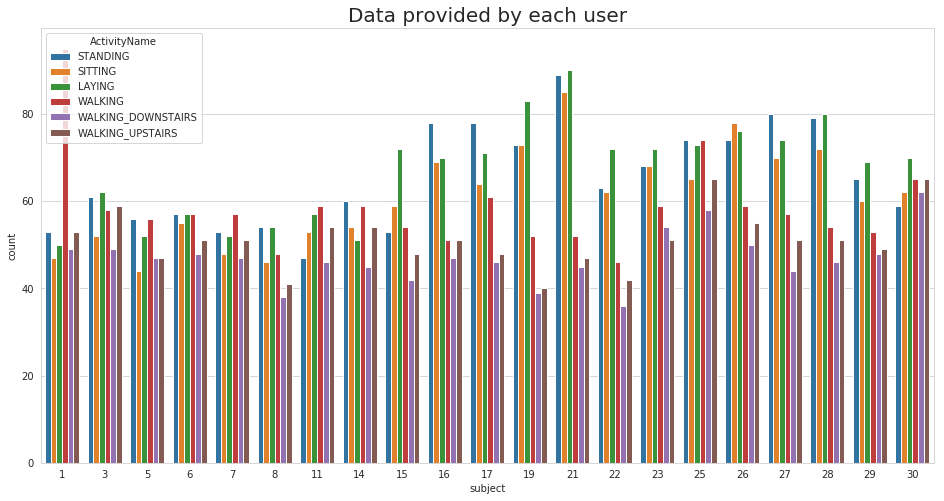

In [21]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

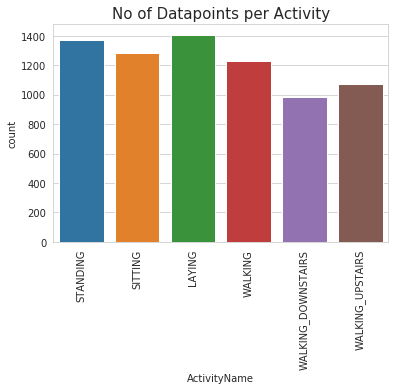

In [22]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [23]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '_')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc_mean_X', 'tBodyAcc_mean_Y', 'tBodyAcc_mean_Z',
       'tBodyAcc_std_X', 'tBodyAcc_std_Y', 'tBodyAcc_std_Z', 'tBodyAcc_mad_X',
       'tBodyAcc_mad_Y', 'tBodyAcc_mad_Z', 'tBodyAcc_max_X',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [27]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

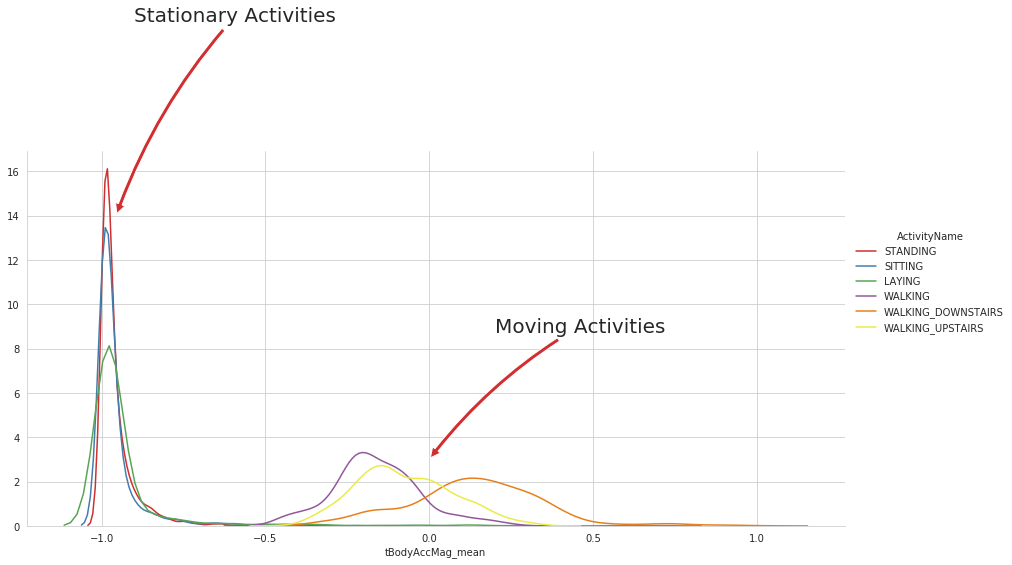

In [36]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag_mean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,14), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

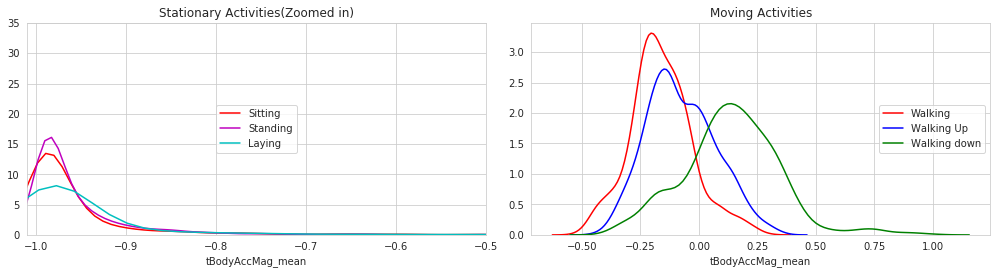

In [39]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMag_mean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMag_mean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMag_mean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMag_mean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMag_mean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMag_mean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

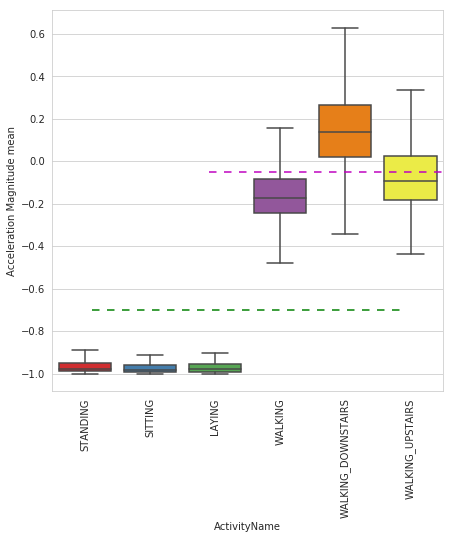

In [41]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMag_mean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

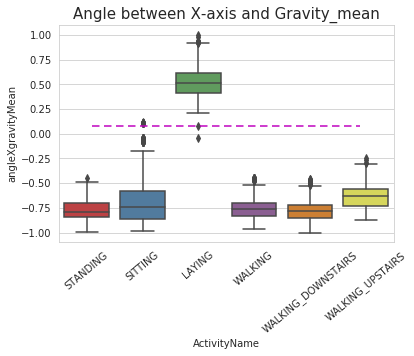

In [43]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

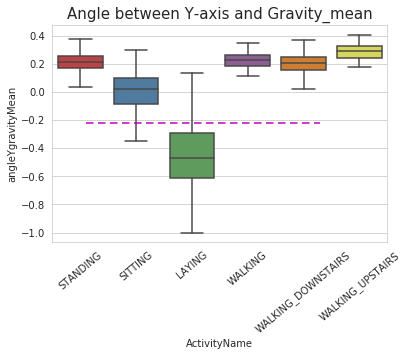

In [44]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [45]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.096s...
[t-SNE] Computed neighbors for 7352 samples in 27.701s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 124.7532959, gradient norm = 0.0285542 (50 iterations in 6.885s)
[t-SNE] Iteration 100: error = 106.8683777, gradient norm = 0.0273265 (50 iterations in

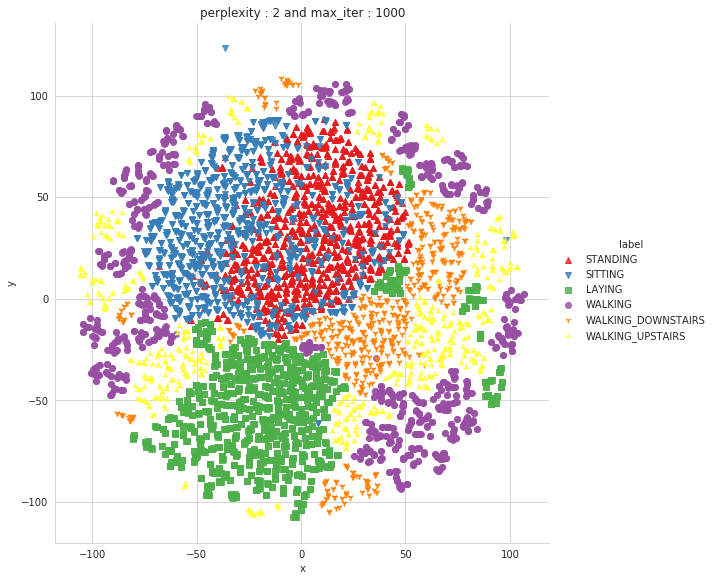

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.085s...
[t-SNE] Computed neighbors for 7352 samples in 27.997s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.058s
[t-SNE] Iteration 50: error = 114.0592880, gradient norm = 0.0203027 (50 iterations in 5.592s)
[t-SNE] Iteration 100: error = 97.2689438, gradient norm = 0.0156565 (50 iteratio

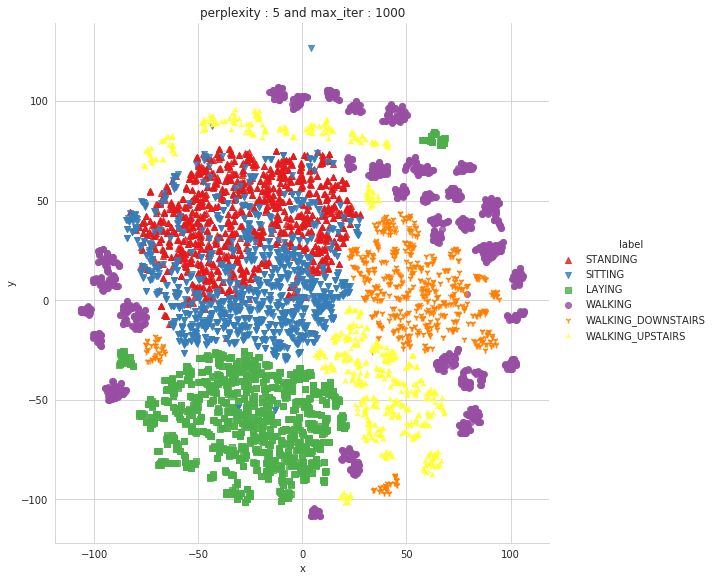

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.085s...
[t-SNE] Computed neighbors for 7352 samples in 28.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.155s
[t-SNE] Iteration 50: error = 105.6137085, gradient norm = 0.0229994 (50 iterations in 4.228s)
[t-SNE] Iteration 100: error = 89.9958496, gradient norm = 0.0122725 (50 iterati

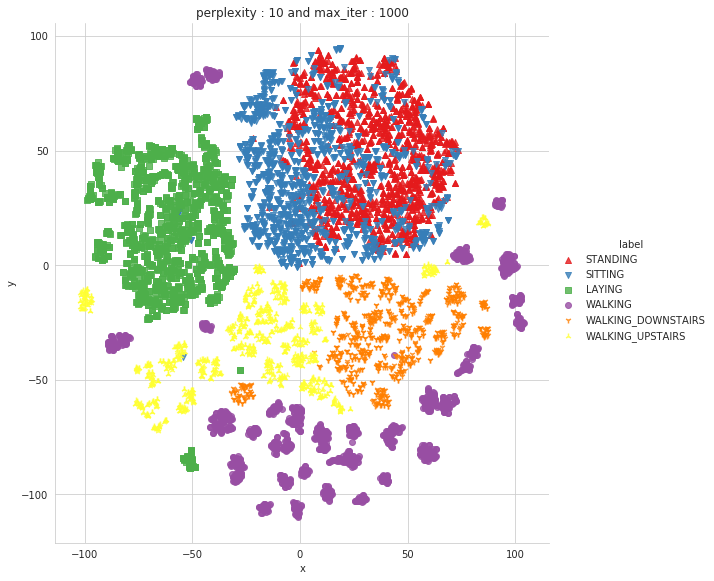

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.085s...
[t-SNE] Computed neighbors for 7352 samples in 29.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.271s
[t-SNE] Iteration 50: error = 97.7926636, gradient norm = 0.0125853 (50 iterations in 10.212s)
[t-SNE] Iteration 100: error = 84.0754013, gradient norm = 0.0064392 (50 iterati

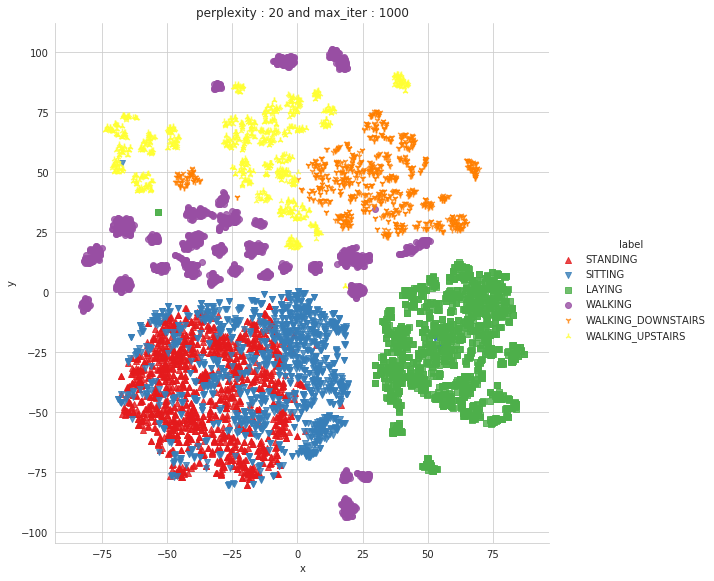

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.086s...
[t-SNE] Computed neighbors for 7352 samples in 29.958s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.563s
[t-SNE] Iteration 50: error = 87.2486420, gradient norm = 0.0071327 (50 iterations in 7.677s)
[t-SNE] Iteration 100: error = 75.6975098, gradient norm = 0.0044917 (50 iterati

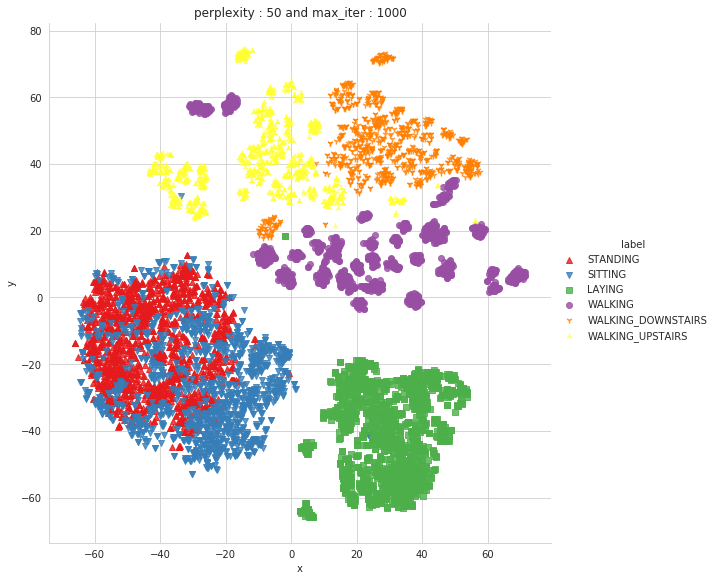

Done


In [47]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])


performing tsne with perplexity 20 and with 2000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.096s...
[t-SNE] Computed neighbors for 7352 samples in 29.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.268s
[t-SNE] Iteration 50: error = 97.7995453, gradient norm = 0.0148661 (50 iterations in 4.925s)
[t-SNE] Iteration 100: error = 84.0072556, gradient norm = 0.0072344 (50 iterations in

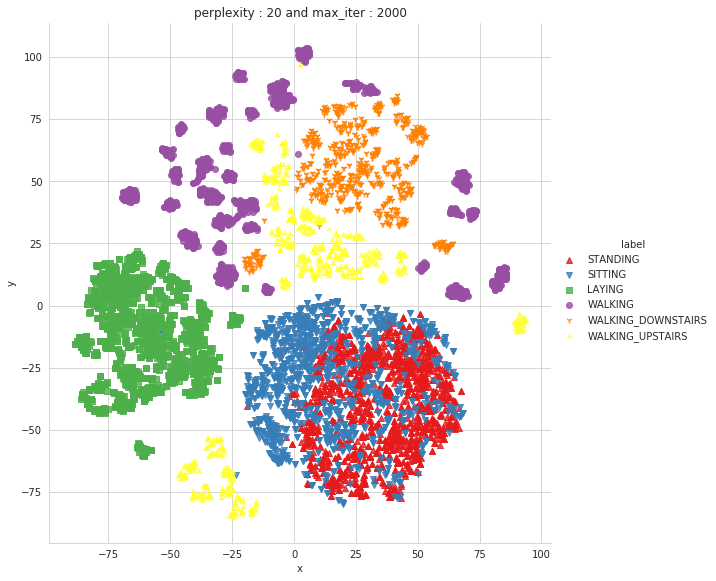

Done

performing tsne with perplexity 50 and with 2000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.084s...
[t-SNE] Computed neighbors for 7352 samples in 29.811s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.563s
[t-SNE] Iteration 50: error = 86.5717087, gradient norm = 0.0175077 (50 iterations in 9.532s)
[t-SNE] Iteration 100: error = 75.5988235, gradient norm = 0.0040401 (50 iterati

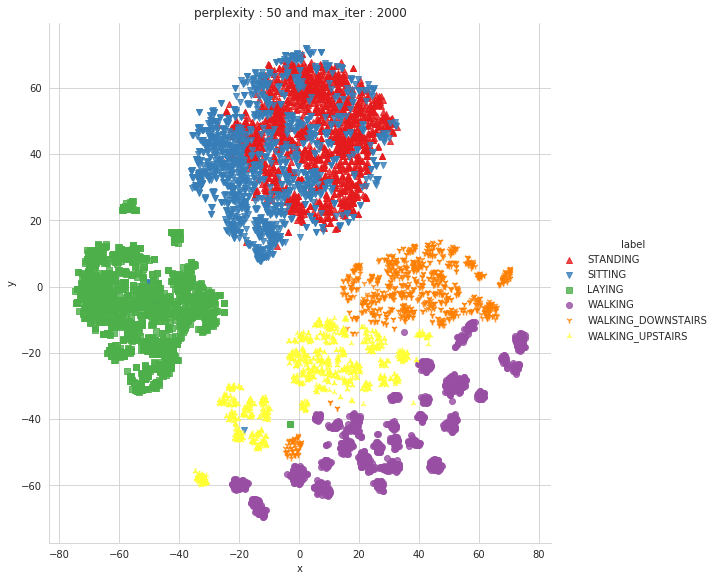

Done

performing tsne with perplexity 90 and with 2000 iterations at max
[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.085s...
[t-SNE] Computed neighbors for 7352 samples in 30.783s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.540175
[t-SNE] Computed conditional probabilities in 0.960s
[t-SNE] Iteration 50: error = 77.8780289, gradient norm = 0.0304282 (50 iterations in 11.843s)
[t-SNE] Iteration 100: error = 69.3429031, gradient norm = 0.0028602 (50 iterat

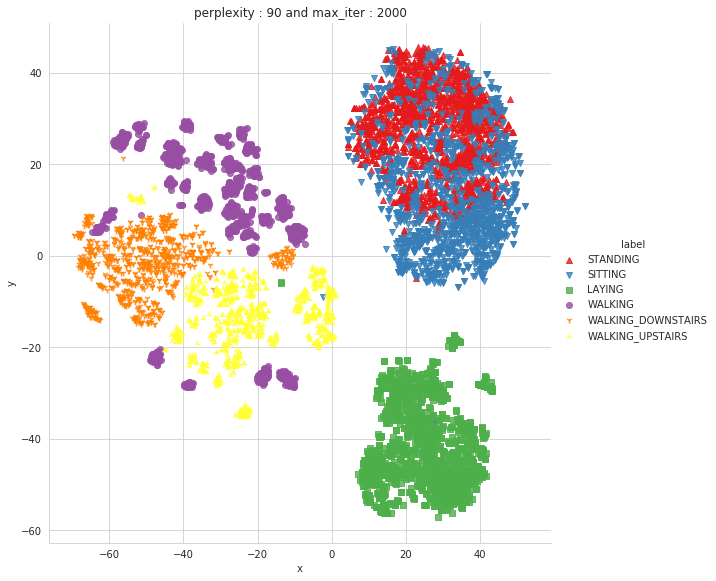

Done


In [48]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20,50,90],n_iter=2000)

## Obtain the train and test data

In [2]:
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [3]:
train.head(1)

,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING


In [4]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [5]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [6]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Let's model with our data

### Labels that are useful in plotting confusion matrix

In [43]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [176]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [177]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [178]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))
    

# 1. Logistic Regression with Grid Search

In [11]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:   31.3s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:41.152479


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.021982


---------------------
|      Accuracy      |
---------------------

    0.9630132337970818


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  57   0   0   4]
 [  0  11 520   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


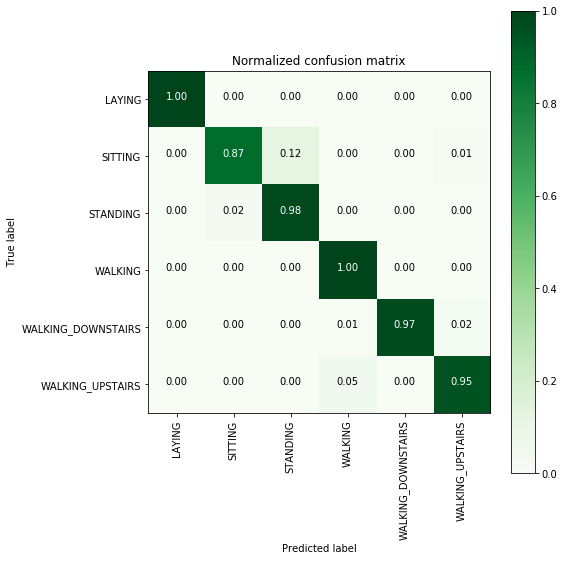

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947



In [12]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=8)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

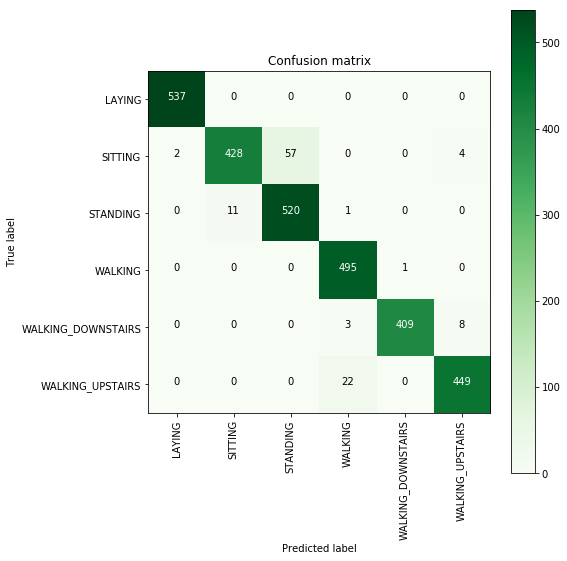

In [13]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [14]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9460010881392819



#  2. Linear SVC with GridSearch

In [15]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    9.5s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:13.065672


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003324


---------------------
|      Accuracy      |
---------------------

    0.9650492025788938


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 420  65   0   0   4]
 [  0   7 524   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]]


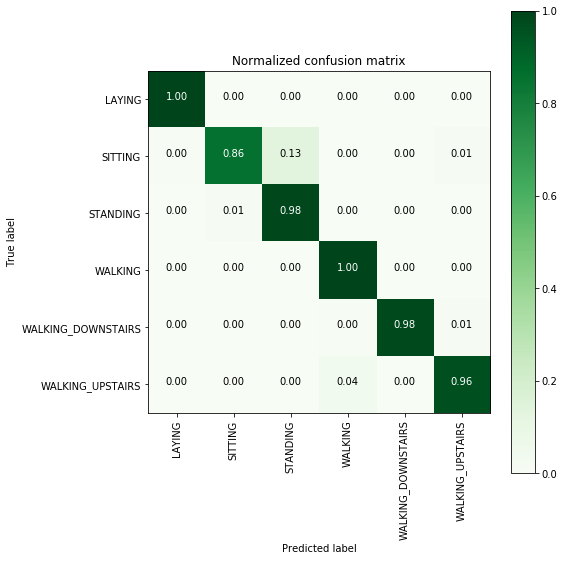

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

       avg / total       0.97      0.97      0.96      2947



In [16]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=8, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [17]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9455930359085963



# 3.  Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:21.703537


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.286671


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


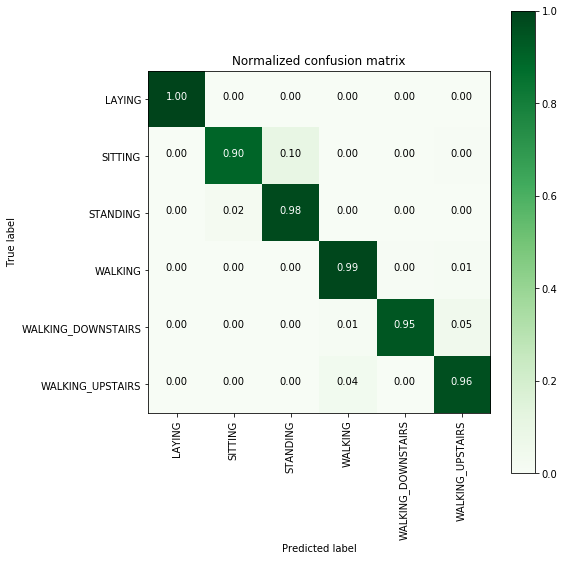

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

       avg / total       0.96      0.96      0.96      2947



In [18]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# 4. Decision Trees with GridSearchCV

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:05.120427


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002483


---------------------
|      Accuracy      |
---------------------

    0.8639294197488971


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 386 105   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  16 343  61]
 [  0   0   0  78  24 369]]


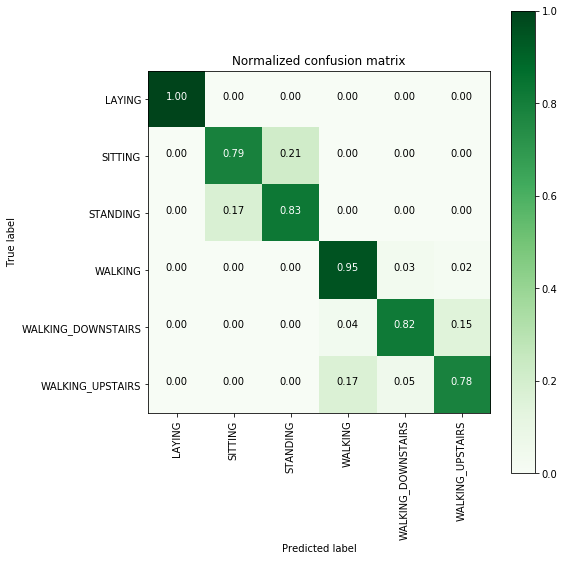

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.90      0.82      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

       avg / total       0.86      0.86      0.86      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------

In [19]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=8)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:59.069438


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.033301


---------------------
|      Accuracy      |
---------------------

    0.9107567017305734


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 422  69   0   0   0]
 [  0  49 483   0   0   0]
 [  0   0   0 482  12   2]
 [  0   0   0  40 335  45]
 [  0   0   0  40   6 425]]


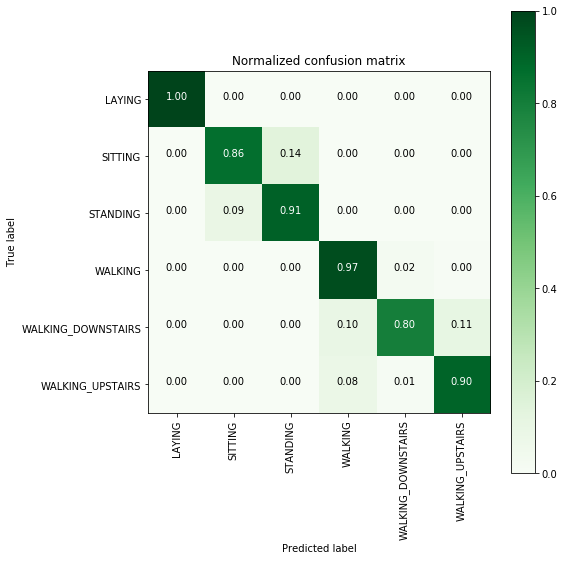

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.91      0.89       532
           WALKING       0.86      0.97      0.91       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

       avg / total       0.91      0.91      0.91      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=1,
            oob_score=Fals

In [20]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=8)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:17:12.707284


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.039210


---------------------
|      Accuracy      |
---------------------

    0.9226331862911435


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 399  90   0   0   2]
 [  0  38 494   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  32   6 432]]


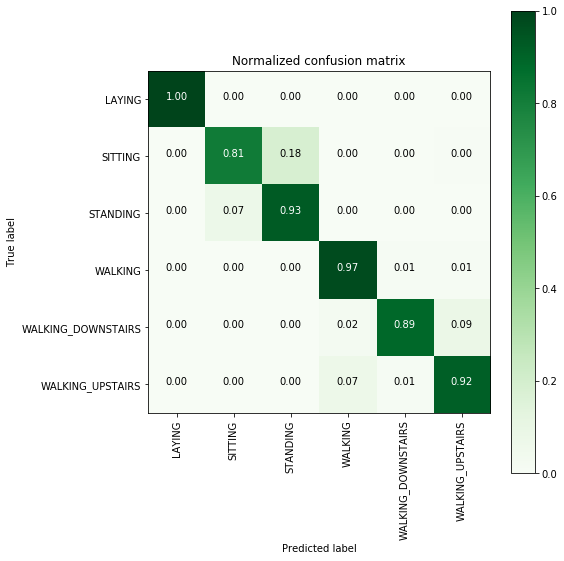

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimato

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=8)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])


# 7. Comparing all models

In [22]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.3%       3.699%
Linear SVC          : 96.5%       3.495% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.39%      13.61% 
Random Forest       : 91.08%      8.924% 
GradientBoosting DT : 91.08%      8.924% 


## Using raw time series data and deep learning methods:
Approch 1 - Using LSTM  
Approch 2 - Using CNN - CNN are useful to get best features and realtions between sequnce data using convolution.  
Approch 3 - Using some cascading techniques. 

## LSTM

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [9]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [10]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [11]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [12]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

In [13]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, y_train, X_test,  y_test

In [12]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [13]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [14]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [14]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [16]:
# Loading the train and test data
X_train, Y_train, X_test,  Y_test = load_data()

In [17]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)
#n_classes  = 6
print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


#### Base Model

In [14]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 54s 7ms/step - loss: 1.3194 - acc: 0.4376 - val_loss: 1.1805 - val_acc: 0.4496
Epoch 2/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.9842 - acc: 0.5749 - val_loss: 0.9447 - val_acc: 0.5857
Epoch 3/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.7991 - acc: 0.6470 - val_loss: 0.7865 - val_acc: 0.6132
Epoch 4/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.6984 - acc: 0.6661 - val_loss: 0.8261 - val_acc: 0.5901
Epoch 5/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.6306 - acc: 0.6876 - val_loss: 0.7671 - val_acc: 0.6434
Epoch 6/30
7352/7352 [==============================] - 52s 7ms/step - loss: 0.6168 - acc: 0.7084 - val_loss: 0.8407 - val_acc: 0.6590
Epoch 7/30
7352/7352 [==============================] - 53s 7ms/step - loss: 0.6056 - acc: 0.7361 - val_loss: 0.6495 - val_acc: 0.7248
Epoch 8

#### Multi layer LSTM

In [16]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_6 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 109s 15ms/step - loss: 1.3081 - acc: 0.4561 - val_loss: 0.9680 - val_acc: 0.5409
Epoch 2/30
7352/7352 [==============================] - 107s 15ms/step - loss: 0.8821 - acc: 0.6051 - val_loss: 0.8140 - val_acc: 0.6284
Epoch 3/30
7352/7352 [==============================] - 106s 14ms/step - loss: 0.7624 - acc: 0.6359 - val_loss: 0.8088 - val_acc: 0.6037
Epoch 4/30
7352/7352 [==============================] - 104s 14ms/step - loss: 0.7258 - acc: 0.6302 - val_loss: 0.7932 - val_acc: 0.6189
Epoch 5/30
7352/7352 [==============================] - 104s 14ms/step - loss: 0.7122 - acc: 0.6474 - val_loss: 0.7969 - val_acc: 0.6189
Epoch 6/30
7352/7352 [==============================] - 104s 14ms/step - loss: 0.6977 - acc: 0.6515 - val_loss: 0.7787 - val_acc: 0.6152
Epoch 7/30
7352/7352 [==============================] - 104s 14ms/step - loss: 0.6750 - acc: 0.6790 - val_loss: 0.7335 - val_acc: 

Above 2 layer LSTM is giving similar score as 1 layer LSTM which we trained above. 

In [14]:
from keras.regularizers import l2

In [20]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32,recurrent_regularizer=l2(0.003),return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(28,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128, 32)           5376      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 28)                6832      
_________________________________________________________________
dropout_8 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 174       
Total params: 12,382
Trainable params: 12,382
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
# Training the model
History = model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=10)

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 107s 15ms/step - loss: 1.4263 - acc: 0.4241 - val_loss: 1.2625 - val_acc: 0.5175
Epoch 2/10
7352/7352 [==============================] - 105s 14ms/step - loss: 1.2066 - acc: 0.5011 - val_loss: 1.5878 - val_acc: 0.3549
Epoch 3/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.9923 - acc: 0.5695 - val_loss: 0.9060 - val_acc: 0.6162
Epoch 4/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.9109 - acc: 0.5839 - val_loss: 0.8547 - val_acc: 0.5962
Epoch 5/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7995 - acc: 0.6223 - val_loss: 0.7806 - val_acc: 0.6176
Epoch 6/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.8123 - acc: 0.6062 - val_loss: 0.8927 - val_acc: 0.5887
Epoch 7/10
7352/7352 [==============================] - 105s 14ms/step - loss: 0.7574 - acc: 0.6319 - val_loss: 0.7507 - val_acc: 

### Hyperparameter Tuning Using Hyperas:

In [18]:
# Importing tensorflow
np.random.seed(36)
import tensorflow as tf
tf.set_random_seed(36)

In [5]:
# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperas.utils import eval_hyperopt_space

In [6]:
##gives train and validation data 
def data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return pd.get_dummies(y).as_matrix()
    
    X_train, X_val = load_signals('train'), load_signals('test')
    Y_train, Y_val = load_y('train'), load_y('test')

    return X_train, Y_train, X_val,  Y_val

In [7]:
from keras.regularizers import l2
import keras

In [8]:
##model
def model(X_train, Y_train, X_val, Y_val):
    # Importing tensorflow
    np.random.seed(36)
    import tensorflow as tf
    tf.set_random_seed(36)
    # Initiliazing the sequential model
    model = Sequential() 
    if conditional({{choice(['one', 'two'])}}) == 'two':
        # Configuring the parameters
        model.add(LSTM({{choice([28,32,38])}},recurrent_regularizer=l2({{uniform(0,0.0002)}}),return_sequences=True,input_shape=(128, 9),name='LSTM2_1'))
        # Adding a dropout layer
        model.add(Dropout({{uniform(0.35,0.65)}},name='Dropout2_1'))
        model.add(LSTM({{choice([26,32,36])}},recurrent_regularizer=l2({{uniform(0,0.001)}}),input_shape=(128, 9),name='LSTM2_2'))
        model.add(Dropout({{uniform(0.5,0.7)}},name='Dropout2_2'))
        # Adding a dense output layer with sigmoid activation
        model.add(Dense(6, activation='sigmoid'))
    else:
        # Configuring the parameters
        model.add(LSTM({{choice([28,32,36])}},recurrent_regularizer=l2({{uniform(0,0.001)}}),input_shape=(128, 9),name='LSTM1_1'))
        # Adding a dropout layer
        model.add(Dropout({{uniform(0.35,0.55)}},name='Dropout1_1'))
        # Adding a dense output layer with sigmoid activation
        model.add(Dense(6, activation='sigmoid'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.009,0.025)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.009,0.025)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train, Y_train,
              batch_size=16,
              nb_epoch=30,
              verbose=2,
              validation_data=(X_val, Y_val))
                       
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    print('Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [ ]:
X_train, Y_train, X_val, Y_val = data()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=15,
                                      trials=trials,notebook_name = 'Human Activity Detection',
                                     return_space = True)

In [48]:
total_trials = dict()
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        print('Model',t+1,'parameters')
        print(vals)
        print()
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z
        print(z)
        print('------------------------------------------------')

Model 1 parameters
{'Dropout': [0.36598023572757926], 'Dropout_1': [0.6047146037530785], 'Dropout_2': [0.5188826519950874], 'LSTM': [0], 'LSTM_1': [1], 'LSTM_2': [1], 'choiceval': [1], 'conditional': [0], 'l2': [0.00016900597529479822], 'l2_1': [0.0006108763092812357], 'l2_2': [0.0007371698374615214], 'lr': [0.01942874904782045], 'lr_1': [0.015993860150909475]}

{'Dropout': 0.36598023572757926, 'Dropout_1': 0.6047146037530785, 'Dropout_2': 0.5188826519950874, 'LSTM': 28, 'LSTM_1': 32, 'LSTM_2': 32, 'choiceval': 'rmsprop', 'conditional': 'one', 'l2': 0.00016900597529479822, 'l2_1': 0.0006108763092812357, 'l2_2': 0.0007371698374615214, 'lr': 0.01942874904782045, 'lr_1': 0.015993860150909475}
------------------------------------------------
Model 2 parameters
{'Dropout': [0.604072168386432], 'Dropout_1': [0.5642077861572957], 'Dropout_2': [0.4689742513688654], 'LSTM': [0], 'LSTM_1': [1], 'LSTM_2': [0], 'choiceval': [1], 'conditional': [1], 'l2': [2.221286943616341e-06], 'l2_1': [0.0009770

In [54]:
best_run

{'Dropout': 0.3802031741395868,
 'Dropout_1': 0.6903389204823146,
 'Dropout_2': 0.3654341425327902,
 'LSTM': 2,
 'LSTM_1': 2,
 'LSTM_2': 1,
 'choiceval': 0,
 'conditional': 0,
 'l2': 0.00015208023802140732,
 'l2_1': 0.000643128044948208,
 'l2_2': 0.0007102309264917989,
 'lr': 0.016347608866364167,
 'lr_1': 0.024543333891182614}

In [55]:
#BEST MODEL PARAMS
total_trials['M14']

{'Dropout': 0.3802031741395868,
 'Dropout_1': 0.6903389204823146,
 'Dropout_2': 0.3654341425327902,
 'LSTM': 38,
 'LSTM_1': 36,
 'LSTM_2': 32,
 'choiceval': 'adam',
 'conditional': 'one',
 'l2': 0.00015208023802140732,
 'l2_1': 0.000643128044948208,
 'l2_2': 0.0007102309264917989,
 'lr': 0.016347608866364167,
 'lr_1': 0.024543333891182614}

In [50]:
#layes of best model
best_model.layers

In [51]:
X_train, Y_train, X_val, Y_val = data()

In [56]:
_,val_acc = best_model.evaluate(X_val, Y_val, verbose=0)
_,train_acc = best_model.evaluate(X_train, Y_train, verbose=0)
print('Train_accuracy',val_acc)
print('validation accuracy',val_acc)

Train_accuracy 0.94560663764961915
validation accuracy 0.9199185612487275


In [15]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix_rnn(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    #return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return metrics.confusion_matrix(Y_true, Y_pred)

In [74]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, best_model.predict(X_val)))

[[537   0   0   0   0   0]
 [  1 412  75   0   0   3]
 [  0  88 444   0   0   0]
 [  0   0   0 464  10  22]
 [  0   0   0  15 390  15]
 [  0   4   0   2   1 464]]


In [16]:
from sklearn import metrics

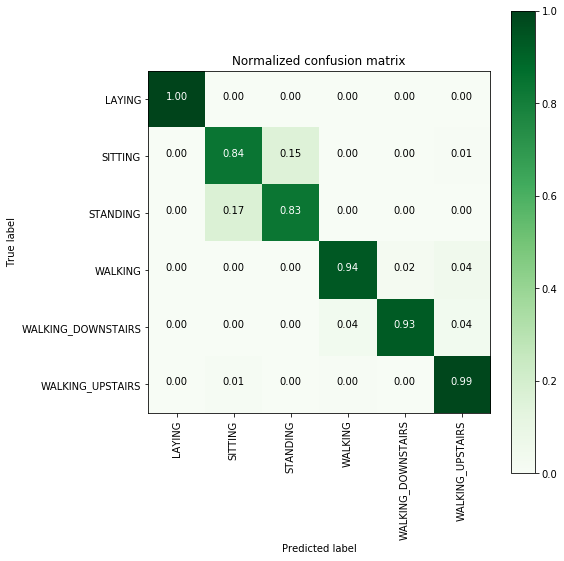

In [80]:
plt.figure(figsize=(8,8))
cm = confusion_matrix_rnn(Y_val, best_model.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

## Using CNN

In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import numpy as np
import tensorflow as tf
import random as rn
np.random.seed(36)
rn.seed(36)
tf.set_random_seed(36)
# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(36)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [3]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [18]:
X_train, Y_train, X_val, Y_val = data()

In [19]:
###Scling data
from sklearn.base import BaseEstimator, TransformerMixin
class scaling_tseries_data(BaseEstimator, TransformerMixin):
    from sklearn.preprocessing import StandardScaler
    def __init__(self):
        self.scale = None

    def transform(self, X):
        temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
        temp_X1 = self.scale.transform(temp_X1)
        return temp_X1.reshape(X.shape)

    def fit(self, X):
        # remove overlaping
        remove = int(X.shape[1] / 2)
        temp_X = X[:, -remove:, :]
        # flatten data
        temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
        scale = StandardScaler()
        scale.fit(temp_X)
        self.scale = scale
        return self

In [20]:
Scale = scaling_tseries_data()
Scale.fit(X_train)
X_train_sc = Scale.transform(X_train)
X_val_sc = Scale.transform(X_val)

In [21]:
print('Shape of scaled X train',X_train_sc.shape)
print('Shape of scaled X test',X_val_sc.shape)

Shape of scaled X train (7352, 128, 9)
Shape of scaled X test (2947, 128, 9)


#### Base Model

In [26]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                99250     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306       
Total para

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(X_train_sc,Y_train, epochs=30, batch_size=16,validation_data=(X_val_sc, Y_val), verbose=1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 6s 764us/step - loss: 0.4207 - acc: 0.8403 - val_loss: 0.3384 - val_acc: 0.8748
Epoch 2/30
7352/7352 [==============================] - 5s 685us/step - loss: 0.1448 - acc: 0.9411 - val_loss: 0.3163 - val_acc: 0.8799
Epoch 3/30
7352/7352 [==============================] - 5s 672us/step - loss: 0.1177 - acc: 0.9486 - val_loss: 0.2963 - val_acc: 0.9226
Epoch 4/30
7352/7352 [==============================] - 5s 686us/step - loss: 0.0912 - acc: 0.9566 - val_loss: 0.2926 - val_acc: 0.9097
Epoch 5/30
7352/7352 [==============================] - 5s 691us/step - loss: 0.0987 - acc: 0.9567 - val_loss: 0.3676 - val_acc: 0.9036
Epoch 6/30
7352/7352 [==============================] - 5s 678us/step - loss: 0.0841 - acc: 0.9619 - val_loss: 0.3184 - val_acc: 0.9036
Epoch 7/30
7352/7352 [==============================] - 5s 695us/step - loss: 0.0727 - acc: 0.9659 - val_loss: 0.3215 - val_acc: 0.9169


it is giving some good score in train as well as test but it is overfitting so much. i will try some regularization in below models. 

In [3]:
from keras.regularizers import l2,l1
import keras
from keras.layers import BatchNormalization

In [117]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2(0.1),input_shape=(128,9)))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu',kernel_regularizer=l2(0.06),kernel_initializer='he_uniform'))
model.add(Dropout(0.65))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_67 (Conv1D)           (None, 126, 32)           896       
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 124, 16)           1552      
_________________________________________________________________
dropout_39 (Dropout)         (None, 124, 16)           0         
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 62, 16)            0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 992)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 32)                31776     
_________________________________________________________________
dense_68 (Dense)             (None, 6)                 198       
Total para

In [118]:
import math
adam = keras.optimizers.Adam(lr=0.001)
rmsprop = keras.optimizers.RMSprop(lr=0.001)
def step_decay(epoch):
    return float(0.001 * math.pow(0.6, math.floor((1+epoch)/10)))
from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [119]:
model.fit(X_train_sc,Y_train, epochs=30, batch_size=16,validation_data=(X_val_sc, Y_val), verbose=1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 6s 879us/step - loss: 4.3454 - acc: 0.7266 - val_loss: 1.5457 - val_acc: 0.7815
Epoch 2/30
7352/7352 [==============================] - 5s 676us/step - loss: 0.7579 - acc: 0.9121 - val_loss: 0.6360 - val_acc: 0.8935
Epoch 3/30
7352/7352 [==============================] - 5s 668us/step - loss: 0.3876 - acc: 0.9286 - val_loss: 0.5337 - val_acc: 0.8772
Epoch 4/30
7352/7352 [==============================] - 5s 673us/step - loss: 0.3123 - acc: 0.9283 - val_loss: 0.4940 - val_acc: 0.8673
Epoch 5/30
7352/7352 [==============================] - 5s 680us/step - loss: 0.2729 - acc: 0.9336 - val_loss: 0.4439 - val_acc: 0.8901
Epoch 6/30
7352/7352 [==============================] - 5s 676us/step - loss: 0.2629 - acc: 0.9327 - val_loss: 0.4330 - val_acc: 0.8775
Epoch 7/30
7352/7352 [==============================] - 5s 664us/step - loss: 0.2423 - acc: 0.9393 - val_loss: 0.4225 - val_acc: 0.8711


#### Hyper Parameter Tuning Using Hyperas

In [4]:
def data_scaled():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            self.scale = scale
            return self
        
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return pd.get_dummies(y).as_matrix()
    
    X_train, X_val = load_signals('train'), load_signals('test')
    Y_train, Y_val = load_y('train'), load_y('test')
    ###Scling data
    Scale = scaling_tseries_data()
    Scale.fit(X_train)
    X_train = Scale.transform(X_train)
    X_val = Scale.transform(X_val)

    return X_train, Y_train, X_val,  Y_val

In [5]:
X_train, Y_train, X_val,  Y_val = data_scaled()

In [6]:
def model_cnn(X_train, Y_train, X_val, Y_val):
    # Importing tensorflow
    np.random.seed(36)
    import tensorflow as tf
    tf.set_random_seed(36)
    # Initiliazing the sequential model
    model = Sequential()
    
    model.add(Conv1D(filters={{choice([28,32,42])}}, kernel_size={{choice([3,5,7])}},activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2({{uniform(0,2.5)}}),input_shape=(128,9)))
    
    model.add(Conv1D(filters={{choice([16,24,32])}}, kernel_size={{choice([3,5,7])}}, 
                     activation='relu',kernel_regularizer=l2({{uniform(0,1.5)}}),kernel_initializer='he_uniform'))
    model.add(Dropout({{uniform(0.45,0.7)}}))
    model.add(MaxPooling1D(pool_size={{choice([2,3])}}))
    model.add(Flatten())
    model.add(Dense({{choice([32,64])}}, activation='relu'))
    model.add(Dense(6, activation='softmax'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.00065,0.004)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.00065,0.004)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train, Y_train,
              batch_size={{choice([16,32,64])}},
              nb_epoch={{choice([25,30,35])}},
              verbose=2,
              validation_data=(X_val, Y_val))
                       
    score, acc = model.evaluate(X_val, Y_val, verbose=0)
    score1, acc1 = model.evaluate(X_train, Y_train, verbose=0)
    print('Train accuracy',acc1,'Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    return {'loss': -acc, 'status': STATUS_OK, 'model': model,'train_acc':acc1}

In [ ]:
X_train, Y_train, X_val, Y_val = data_scaled()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model_cnn,
                                      data=data_scaled,
                                      algo=tpe.suggest,
                                      max_evals=100,
                                      trials=trials,notebook_name = 'Human Activity Detection',
                                      return_space = True)

In [10]:
from hyperas.utils import eval_hyperopt_space
total_trials = dict()
total_list = []
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z

In [11]:
best_run

{'Dense': 1,
 'Dropout': 0.6397045095598795,
 'batch_size': 2,
 'choiceval': 0,
 'filters': 1,
 'filters_1': 1,
 'kernel_size': 2,
 'kernel_size_1': 0,
 'l2': 0.07999281751224634,
 'l2_1': 0.0012673510937627475,
 'lr': 0.0011215010543928203,
 'lr_1': 0.0021517590741381726,
 'nb_epoch': 0,
 'pool_size': 1}

In [12]:
#best Hyper params from hyperas
eval_hyperopt_space(space, best_run)

{'Dense': 64,
 'Dropout': 0.6397045095598795,
 'batch_size': 64,
 'choiceval': 'adam',
 'filters': 32,
 'filters_1': 24,
 'kernel_size': 7,
 'kernel_size_1': 3,
 'l2': 0.07999281751224634,
 'l2_1': 0.0012673510937627475,
 'lr': 0.0011215010543928203,
 'lr_1': 0.0021517590741381726,
 'nb_epoch': 25,
 'pool_size': 3}

In [13]:
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_119 (Conv1D)          (None, 122, 32)           2048      
_________________________________________________________________
conv1d_120 (Conv1D)          (None, 120, 24)           2328      
_________________________________________________________________
dropout_60 (Dropout)         (None, 120, 24)           0         
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 40, 24)            0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 960)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 64)                61504     
_________________________________________________________________
dense_120 (Dense)            (None, 6)                 390       
Total para

In [14]:
_,acc_val = best_model.evaluate(X_val,Y_val,verbose=0)
_,acc_train = best_model.evaluate(X_train,Y_train,verbose=0)
print('Train_accuracy',acc_train,'test_accuracy',acc_val)

Train_accuracy 0.963139281828074 test_accuracy 0.9229725144214456


In [35]:
# Confusion Matrix
print(confusion_matrix_rnn(Y_val, best_model.predict(X_val)))

[[537   0   0   0   0   0]
 [  0 385  81   0   0  25]
 [  0  80 452   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0   0 415   5]
 [  0   1   0   0  23 447]]


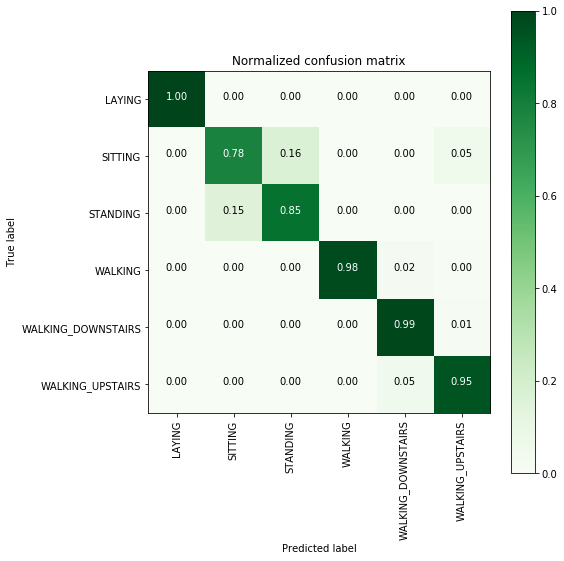

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
cm = confusion_matrix_rnn(Y_val, best_model.predict(X_val))
plot_confusion_matrix(cm, classes=labels, normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

We can observe some overfitting in the model. and it is also giving some good results and error is mainly due to static activities. so below model came up wit some different approch to overcome this problem. 

### Divide and Conquer-Based:

In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.  
WALKING as 1  
WALKING_UPSTAIRS as 2  
WALKING_DOWNSTAIRS as 3  
SITTING as 4  
STANDING as 5  
LAYING as 6    
- in Data exploration section we observed that we can divide the data into dynamic and static type so devided walking,waling_upstairs,walking_downstairs into  category 0 i.e Dynamic, sitting, standing, laying into category 1 i.e. static. 
- Will use 2 more classifiers seperatly for classifying classes of dynamic and static activities. so that model can learn differnt features for static and dynamic activities


referred below paper  
Divide and Conquer-Based 1D CNN Human Activity Recognition Using Test Data Sharpening ( https://www.mdpi.com/1424-8220/18/4/1055/pdf )

In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import numpy as np
import tensorflow as tf
import random as rn
np.random.seed(0)
rn.seed(0)
tf.set_random_seed(0)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(0)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [145]:
## Classifying data as 2 class dynamic vs static 
##data preparation
def data_scaled_2class():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            ##saving for furter usage
            ## will use in predicton pipeline
            pickle.dump(scale,open('Scale_2class.p','wb'))
            self.scale = scale
            return self
        
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        y[y<=3] = 0
        y[y>3] = 1
        return pd.get_dummies(y).as_matrix()
    
    X_train_2c, X_val_2c = load_signals('train'), load_signals('test')
    Y_train_2c, Y_val_2c = load_y('train'), load_y('test')
    ###Scling data
    Scale = scaling_tseries_data()
    Scale.fit(X_train_2c)
    X_train_2c = Scale.transform(X_train_2c)
    X_val_2c = Scale.transform(X_val_2c)
    return X_train_2c, Y_train_2c, X_val_2c,  Y_val_2c

In [144]:
X_train_2c, Y_train_2c, X_val_2c,  Y_val_2c = data_scaled_2class()

In [68]:
print(Y_train_2c.shape)
print(Y_val_2c.shape)

(7352, 2)
(2947, 2)


#### Model for classifying data into Static and Dynamic activities

In [72]:
K.clear_session()
np.random.seed(0)
tf.set_random_seed(0)
sess = tf.Session(graph=tf.get_default_graph())
K.set_session(sess)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 126, 32)           896       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 124, 32)           3104      
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                99250     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total para

In [73]:
import math
adam = keras.optimizers.Adam(lr=0.001)

In [74]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X_train_2c,Y_train_2c, epochs=20, batch_size=16,validation_data=(X_val_2c, Y_val_2c), verbose=1)

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 4s 580us/step - loss: 0.0549 - acc: 0.9791 - val_loss: 0.0127 - val_acc: 0.9973
Epoch 2/20
7352/7352 [==============================] - 4s 482us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0120 - val_acc: 0.9969
Epoch 3/20
7352/7352 [==============================] - 4s 484us/step - loss: 7.9422e-04 - acc: 0.9997 - val_loss: 0.0122 - val_acc: 0.9936
Epoch 4/20
7352/7352 [==============================] - 4s 483us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0168 - val_acc: 0.9963
Epoch 5/20
7352/7352 [==============================] - 4s 481us/step - loss: 1.3106e-04 - acc: 1.0000 - val_loss: 0.0102 - val_acc: 0.9986
Epoch 6/20
7352/7352 [==============================] - 4s 480us/step - loss: 1.7091e-05 - acc: 1.0000 - val_loss: 0.0124 - val_acc: 0.9983
Epoch 7/20
7352/7352 [==============================] - 4s 480us/step - loss: 0.0022 - acc: 0.9997 - val_loss: 0.0162 - val_

In [75]:
_,acc_val = model.evaluate(X_val_2c,Y_val_2c,verbose=0)
_,acc_train = model.evaluate(X_train_2c,Y_train_2c,verbose=0)
print('Train_accuracy',acc_train,'test_accuracy',acc_val)

Train_accuracy 1.0 test_accuracy 0.9989820156090939


In [76]:
##saving model
model.save('final_model_2class.h5')

This model is almost classifying data into dynammic or static correctly with very hig accuracy.

### Classificaton of Static activities

In [149]:
##data preparation
def data_scaled_static():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            #for furter use at prediction pipeline
            pickle.dump(scale,open('Scale_static.p','wb'))
            self.scale = scale
            return self
        
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        y_subset = y>3
        y = y[y_subset]
        return pd.get_dummies(y).as_matrix(),y_subset
    
    Y_train_s,y_train_sub = load_y('train')
    Y_val_s,y_test_sub = load_y('test')
    X_train_s, X_val_s = load_signals('train'), load_signals('test')
    X_train_s = X_train_s[y_train_sub]
    X_val_s = X_val_s[y_test_sub]
    
    ###Scling data
    Scale = scaling_tseries_data()
    Scale.fit(X_train_s)
    X_train_s = Scale.transform(X_train_s)
    X_val_s = Scale.transform(X_val_s)

    return X_train_s, Y_train_s, X_val_s,  Y_val_s

In [150]:
X_train_s, Y_train_s, X_val_s,  Y_val_s = data_scaled_static()

In [7]:
print('X Shape of train data',X_train_s.shape, 'Y shape', Y_train_s.shape)
print('X Shape of val data',X_val_s.shape,'Y shape',Y_val_s.shape)

X Shape of train data (4067, 128, 9) Y shape (4067, 3)
X Shape of val data (1560, 128, 9) Y shape (1560, 3)


In [8]:
import keras

#### Baseline Model

In [24]:
np.random.seed(0)
tf.set_random_seed(0)
sess = tf.Session(graph=tf.get_default_graph())
K.set_session(sess)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 122, 64)           4096      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 120, 32)           6176      
_________________________________________________________________
dropout_2 (Dropout)          (None, 120, 32)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 40, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                38430     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 93        
Total para

In [25]:
import math
adam = keras.optimizers.Adam(lr=0.004)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X_train_s,Y_train_s, epochs=20, batch_size=32,validation_data=(X_val_s, Y_val_s), verbose=1)
K.clear_session()

Train on 4067 samples, validate on 1560 samples
Epoch 1/20
4067/4067 [==============================] - 2s 530us/step - loss: 0.4023 - acc: 0.8773 - val_loss: 0.2665 - val_acc: 0.8974
Epoch 2/20
4067/4067 [==============================] - 1s 352us/step - loss: 0.2302 - acc: 0.9240 - val_loss: 0.2560 - val_acc: 0.8942
Epoch 3/20
4067/4067 [==============================] - 1s 352us/step - loss: 0.2163 - acc: 0.9235 - val_loss: 0.2900 - val_acc: 0.8878
Epoch 4/20
4067/4067 [==============================] - 1s 351us/step - loss: 0.1732 - acc: 0.9348 - val_loss: 0.3296 - val_acc: 0.8910
Epoch 5/20
4067/4067 [==============================] - 1s 352us/step - loss: 0.1471 - acc: 0.9432 - val_loss: 0.2661 - val_acc: 0.9000
Epoch 6/20
4067/4067 [==============================] - 1s 354us/step - loss: 0.1296 - acc: 0.9498 - val_loss: 0.2430 - val_acc: 0.9109
Epoch 7/20
4067/4067 [==============================] - 1s 353us/step - loss: 0.1704 - acc: 0.9422 - val_loss: 0.3748 - val_acc: 0.8795


In [40]:
def model_cnn(X_train_s, Y_train_s, X_val_s, Y_val_s):
    np.random.seed(0)
    tf.set_random_seed(0)
    sess = tf.Session(graph=tf.get_default_graph())
    K.set_session(sess)
    # Initiliazing the sequential model
    model = Sequential()
    
    model.add(Conv1D(filters={{choice([28,32,42])}}, kernel_size={{choice([3,5,7])}},activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2({{uniform(0,3)}}),input_shape=(128,9)))
    
    model.add(Conv1D(filters={{choice([16,24,32])}}, kernel_size={{choice([3,5,7])}}, 
                     activation='relu',kernel_regularizer=l2({{uniform(0,2)}}),kernel_initializer='he_uniform'))
    model.add(Dropout({{uniform(0.45,0.7)}}))
    model.add(MaxPooling1D(pool_size={{choice([2,3,5])}}))
    model.add(Flatten())
    model.add(Dense({{choice([16,32,64])}}, activation='relu'))
    model.add(Dense(3, activation='softmax'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.00065,0.004)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.00065,0.004)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train_s, Y_train_s,
              batch_size={{choice([16,32,64])}},
              nb_epoch={{choice([25,30,35])}},
              verbose=2,
              validation_data=(X_val_s, Y_val_s))
                       
    score, acc = model.evaluate(X_val_s, Y_val_s, verbose=0)
    score1, acc1 = model.evaluate(X_train_s, Y_train_s, verbose=0)
    print('Train accuracy',acc1,'Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    K.clear_session()
    return {'loss': -acc, 'status': STATUS_OK,'train_acc':acc1}

In [ ]:
X_train, Y_train, X_val, Y_val = data_scaled_static()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model_cnn,
                                      data=data_scaled_static,
                                      algo=tpe.suggest,
                                      max_evals=120,rseed = 0,                                           
                                      trials=trials,notebook_name = 'Human Activity Detection',
                                      return_space = True)

In [12]:
best_run

{'Dense': 2,
 'Dense_1': 2,
 'Dropout': 0.45377377480700615,
 'choiceval': 1,
 'filters': 1,
 'filters_1': 0,
 'kernel_size': 1,
 'kernel_size_1': 0,
 'l2': 0.0019801221163149862,
 'l2_1': 0.8236255110533577,
 'lr': 0.003918784585237195,
 'lr_1': 0.002237071747066137,
 'nb_epoch': 1,
 'pool_size': 0}

In [21]:
from hyperas.utils import eval_hyperopt_space
total_trials = dict()
total_list = []
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z


#best Hyper params from hyperas
best_params = eval_hyperopt_space(space, best_run)
best_params

{'Dense': 64,
 'Dense_1': 64,
 'Dropout': 0.45377377480700615,
 'choiceval': 'rmsprop',
 'filters': 32,
 'filters_1': 16,
 'kernel_size': 5,
 'kernel_size_1': 3,
 'l2': 0.0019801221163149862,
 'l2_1': 0.8236255110533577,
 'lr': 0.003918784585237195,
 'lr_1': 0.002237071747066137,
 'nb_epoch': 30,
 'pool_size': 2}

In [3]:
from keras.regularizers import l2

In [71]:
##model from hyperas
def keras_fmin_fnct(space,verbose=1):   
    np.random.seed(0)
    tf.set_random_seed(0)
    sess = tf.Session(graph=tf.get_default_graph())
    K.set_session(sess)
    # Initiliazing the sequential model
    model = Sequential()
    model.add(Conv1D(filters=space['filters'], kernel_size=space['kernel_size'],activation='relu',
                    kernel_initializer='he_uniform',
                    kernel_regularizer=l2(space['l2']),input_shape=(128,9)))
    model.add(Conv1D(filters=space['filters_1'], kernel_size=space['kernel_size_1'], 
                activation='relu',kernel_regularizer=l2(space['l2_1']),kernel_initializer='he_uniform'))
    model.add(Dropout(space['Dropout']))
    model.add(MaxPooling1D(pool_size=space['pool_size']))
    model.add(Flatten())
    model.add(Dense(space['Dense'], activation='relu'))
    model.add(Dense(3, activation='softmax'))
    adam = keras.optimizers.Adam(lr=space['lr'])
    rmsprop = keras.optimizers.RMSprop(lr=space['lr_1'])
    choiceval = space['choiceval']
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    print(model.summary())
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    result = model.fit(X_train_s, Y_train_s,
                    batch_size=space['Dense_1'],
                    nb_epoch=space['nb_epoch'],
                    verbose=verbose,
                    validation_data=(X_val_s, Y_val_s))
    #K.clear_session()
    return model,result

In [28]:
best_model,result = keras_fmin_fnct(best_params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 124, 32)           1472      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 122, 16)           1552      
_________________________________________________________________
dropout_2 (Dropout)          (None, 122, 16)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 61, 16)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 976)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                62528     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
Total para

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4067 samples, validate on 1560 samples
Epoch 1/30
4067/4067 [==============================] - 1s 350us/step - loss: 10.6708 - acc: 0.8375 - val_loss: 3.0312 - val_acc: 0.8923
Epoch 2/30
4067/4067 [==============================] - 1s 184us/step - loss: 1.2846 - acc: 0.8960 - val_loss: 0.6160 - val_acc: 0.8788
Epoch 3/30
4067/4067 [==============================] - 1s 184us/step - loss: 0.4912 - acc: 0.8943 - val_loss: 0.4795 - val_acc: 0.8628
Epoch 4/30
4067/4067 [==============================] - 1s 184us/step - loss: 0.3866 - acc: 0.9053 - val_loss: 0.4627 - val_acc: 0.8506
Epoch 5/30
4067/4067 [==============================] - 1s 184us/step - loss: 0.3421 - acc: 0.9098 - val_loss: 0.4827 - val_acc: 0.8724
Epoch 6/30
4067/4067 [==============================] - 1s 184us/step - loss: 0.3151 - acc: 0.9166 - val_loss: 0.3515 - val_acc: 0.8968
Epoch 7/30
4067/4067 [==============================] - 1s 183us/step - loss: 0.3091 - acc: 0.9154 - val_loss: 0.3364 - val_acc: 0.8853

In [32]:
_,acc_val = best_model.evaluate(X_val_s,Y_val_s,verbose=0)
_,acc_train = best_model.evaluate(X_train_s,Y_train_s,verbose=0)
print('Train_accuracy',acc_train,'test_accuracy',acc_val)

Train_accuracy 0.9628718957462503 test_accuracy 0.9391025641025641


i can observe that 23rd model is also giving good scores in runtime so will try once wit that params.

In [38]:
runtime_param = total_trials['M23']
runtime_param

{'Dense': 64,
 'Dense_1': 64,
 'Dropout': 0.45377377480700615,
 'choiceval': 'rmsprop',
 'filters': 32,
 'filters_1': 16,
 'kernel_size': 5,
 'kernel_size_1': 3,
 'l2': 0.0019801221163149862,
 'l2_1': 0.8236255110533577,
 'lr': 0.003918784585237195,
 'lr_1': 0.002237071747066137,
 'nb_epoch': 30,
 'pool_size': 2}

In [63]:
runtime_param['nb_epoch'] = 150

In [64]:
runtime_best_model,result = keras_fmin_fnct(runtime_param)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 124, 32)           1472      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 16)           1552      
_________________________________________________________________
dropout_1 (Dropout)          (None, 122, 16)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 976)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                62528     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total para

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4067 samples, validate on 1560 samples
Epoch 1/150
4067/4067 [==============================] - 1s 344us/step - loss: 10.6708 - acc: 0.8375 - val_loss: 3.0312 - val_acc: 0.8923
Epoch 2/150
4067/4067 [==============================] - 1s 186us/step - loss: 1.2846 - acc: 0.8960 - val_loss: 0.6160 - val_acc: 0.8788
Epoch 3/150
4067/4067 [==============================] - 1s 184us/step - loss: 0.4912 - acc: 0.8943 - val_loss: 0.4795 - val_acc: 0.8628
Epoch 4/150
4067/4067 [==============================] - 1s 185us/step - loss: 0.3866 - acc: 0.9053 - val_loss: 0.4627 - val_acc: 0.8506
Epoch 5/150
4067/4067 [==============================] - 1s 183us/step - loss: 0.3421 - acc: 0.9098 - val_loss: 0.4827 - val_acc: 0.8724
Epoch 6/150
4067/4067 [==============================] - 1s 183us/step - loss: 0.3151 - acc: 0.9166 - val_loss: 0.3515 - val_acc: 0.8968
Epoch 7/150
4067/4067 [==============================] - 1s 183us/step - loss: 0.3091 - acc: 0.9154 - val_loss: 0.3364 - val_acc:

4067/4067 [==============================] - 1s 183us/step - loss: 0.1312 - acc: 0.9666 - val_loss: 0.2589 - val_acc: 0.9276
Epoch 61/150
4067/4067 [==============================] - 1s 183us/step - loss: 0.1295 - acc: 0.9668 - val_loss: 0.3615 - val_acc: 0.8885
Epoch 62/150
4067/4067 [==============================] - 1s 183us/step - loss: 0.1288 - acc: 0.9673 - val_loss: 0.2591 - val_acc: 0.9256
Epoch 63/150
4067/4067 [==============================] - 1s 185us/step - loss: 0.1601 - acc: 0.9658 - val_loss: 0.2101 - val_acc: 0.9526
Epoch 64/150
4067/4067 [==============================] - 1s 185us/step - loss: 0.1275 - acc: 0.9702 - val_loss: 0.3392 - val_acc: 0.8987
Epoch 65/150
4067/4067 [==============================] - 1s 185us/step - loss: 0.1365 - acc: 0.9648 - val_loss: 0.3122 - val_acc: 0.9038
Epoch 66/150
4067/4067 [==============================] - 1s 183us/step - loss: 0.1385 - acc: 0.9671 - val_loss: 0.4001 - val_acc: 0.8904
Epoch 67/150
4067/4067 [=======================

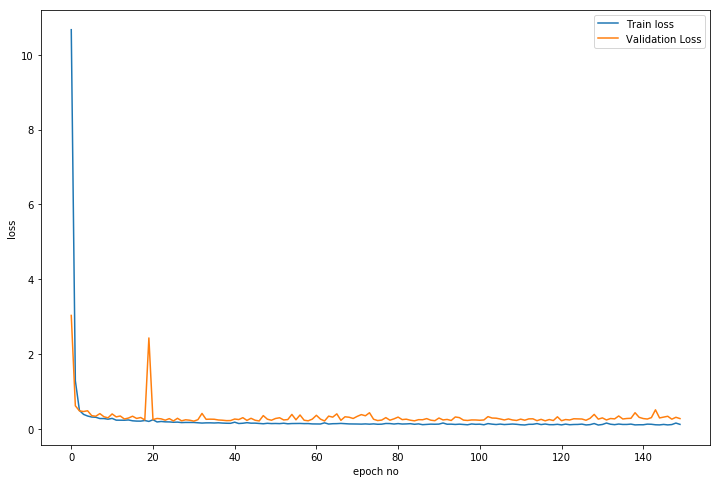

In [66]:
plt.figure(figsize=(12,8))
plt.plot(result.history['loss'],label='Train loss')
plt.plot(result.history['val_loss'],label = 'Validation Loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

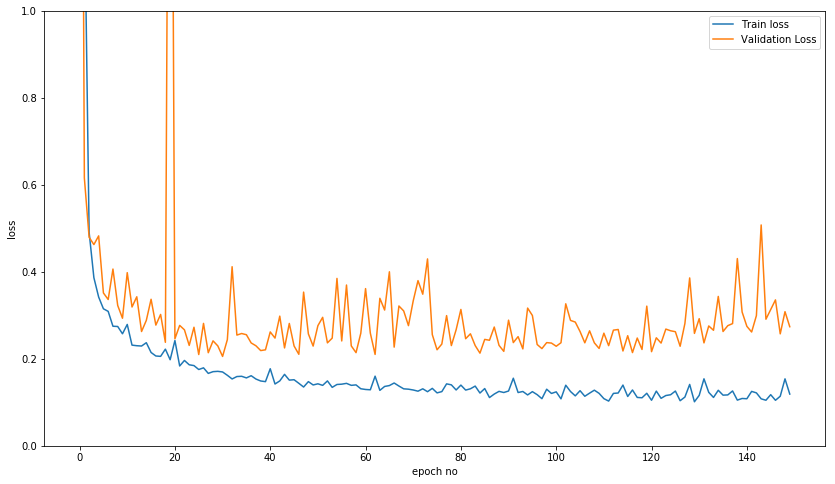

In [67]:
plt.figure(figsize=(14,8))
plt.plot(result.history['loss'],label='Train loss')
plt.plot(result.history['val_loss'],label = 'Validation Loss')
plt.ylim(0,1)
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

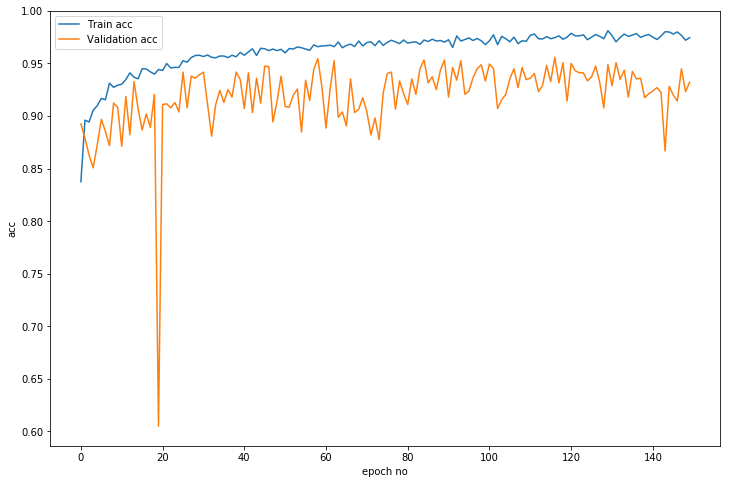

In [68]:
plt.figure(figsize=(12,8))
plt.plot(result.history['acc'],label='Train acc')
plt.plot(result.history['val_acc'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()

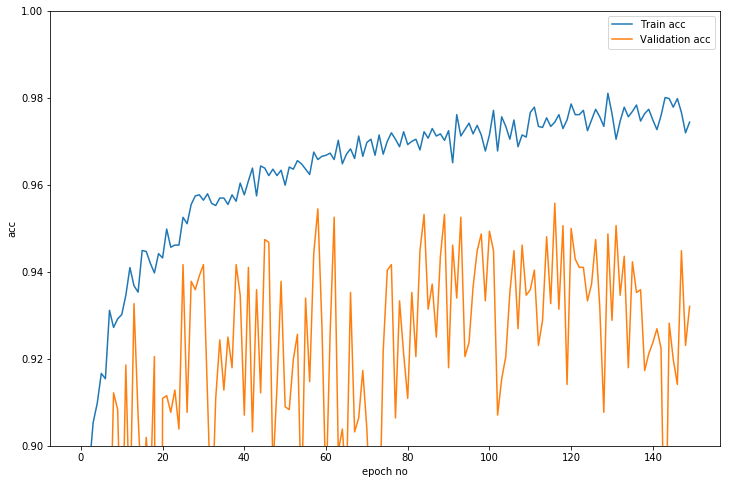

In [69]:
plt.figure(figsize=(12,8))
plt.plot(result.history['acc'],label='Train acc')
plt.plot(result.history['val_acc'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.ylim(0.90,1)
plt.legend()
plt.show()

around 57-59 score is giving good accuracy wit less overfitting

In [77]:
runtime_param['nb_epoch'] = 59
best_model,result = keras_fmin_fnct(runtime_param)

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x148471f420b8>>
Traceback (most recent call last):
  File "/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1398, in __del__
    self._session._session, self._handle, status)
  File "/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/tensorflow/python/framework/errors_impl.py", line 519, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 149842480
/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 124, 32)           1472      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 16)           1552      
_________________________________________________________________
dropout_1 (Dropout)          (None, 122, 16)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 976)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                62528     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total para

In [78]:
_,acc_val = best_model.evaluate(X_val_s,Y_val_s,verbose=0)
_,acc_train = best_model.evaluate(X_train_s,Y_train_s,verbose=0)
print('Train_accuracy',acc_train,'test_accuracy',acc_val)

Train_accuracy 0.9741824440619621 test_accuracy 0.9544871794871795


In [81]:
# Confusion Matrix
# Activities are the class labels
# It is a 3 class classification
from sklearn import metrics
ACTIVITIES = {
    0: 'SITTING',
    1: 'STANDING',
    2: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix_cnn(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    #return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return metrics.confusion_matrix(Y_true, Y_pred)

# Confusion Matrix
print(confusion_matrix_cnn(Y_val_s, best_model.predict(X_val_s)))

[[534   3   0]
 [  0 450  41]
 [  0  27 505]]


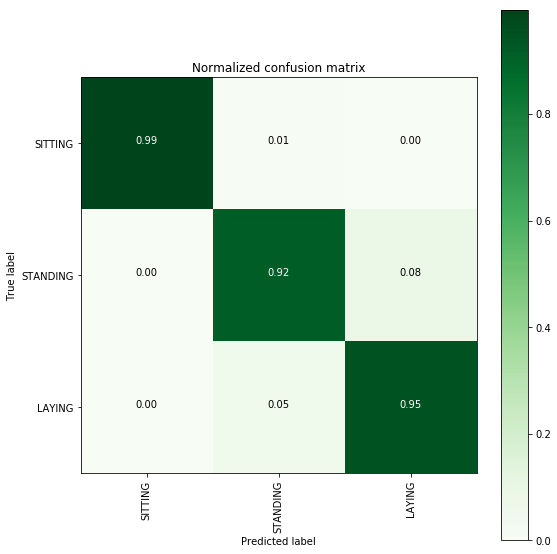

In [83]:
plt.figure(figsize=(8,8))
cm = confusion_matrix_cnn(Y_val_s, best_model.predict(X_val_s))
plot_confusion_matrix(cm, classes=['SITTING','STANDING','LAYING'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

it was better than confusion metric with all data. We improved our model for classiying static activities alot than previous approc models. 

In [84]:
##saving model
best_model.save('final_model_static.h5')

### Classification of Dynamic activities :

In [151]:
##data preparation
def data_scaled_dynamic():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    from sklearn.base import BaseEstimator, TransformerMixin
    class scaling_tseries_data(BaseEstimator, TransformerMixin):
        from sklearn.preprocessing import StandardScaler
        def __init__(self):
            self.scale = None

        def transform(self, X):
            temp_X1 = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
            temp_X1 = self.scale.transform(temp_X1)
            return temp_X1.reshape(X.shape)

        def fit(self, X):
            # remove overlaping
            remove = int(X.shape[1] / 2)
            temp_X = X[:, -remove:, :]
            # flatten data
            temp_X = temp_X.reshape((temp_X.shape[0] * temp_X.shape[1], temp_X.shape[2]))
            scale = StandardScaler()
            scale.fit(temp_X)
            pickle.dump(scale,open('Scale_dynamic.p','wb'))
            self.scale = scale
            return self
        
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        y_subset = y<=3
        y = y[y_subset]
        return pd.get_dummies(y).as_matrix(),y_subset
    
    Y_train_d,y_train_sub = load_y('train')
    Y_val_d,y_test_sub = load_y('test')
    X_train_d, X_val_d = load_signals('train'), load_signals('test')
    X_train_d = X_train_d[y_train_sub]
    X_val_d = X_val_d[y_test_sub]
    
    ###Scling data
    Scale = scaling_tseries_data()
    Scale.fit(X_train_d)
    X_train_d = Scale.transform(X_train_d)
    X_val_d = Scale.transform(X_val_d)

    return X_train_d, Y_train_d, X_val_d,  Y_val_d

In [152]:
X_train_d, Y_train_d, X_val_d,  Y_val_d = data_scaled_dynamic()

In [153]:
print('Train X shape',X_train_d.shape,'Test X shape',X_val_d.shape)
print('Train Y shape',Y_train_d.shape,'Test Y shape',Y_val_d.shape)

Train X shape (3285, 128, 9) Test X shape (1387, 128, 9)
Train Y shape (3285, 3) Test Y shape (1387, 3)


#### Baseline Model

In [96]:
np.random.seed(0)
tf.set_random_seed(0)
sess = tf.Session(graph=tf.get_default_graph())
K.set_session(sess)
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu',kernel_initializer='he_uniform',input_shape=(128,9)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 122, 64)           4096      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 120, 32)           6176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 40, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                38430     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 93        
Total para

In [97]:
import math
adam = keras.optimizers.Adam(lr=0.004)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X_train_s,Y_train_s, epochs=100, batch_size=16,validation_data=(X_val_s, Y_val_s), verbose=1)
K.clear_session()

Train on 4067 samples, validate on 1560 samples
Epoch 1/100
4067/4067 [==============================] - 3s 646us/step - loss: 0.3741 - acc: 0.8835 - val_loss: 0.2909 - val_acc: 0.8885
Epoch 2/100
4067/4067 [==============================] - 2s 469us/step - loss: 0.2112 - acc: 0.9179 - val_loss: 0.3365 - val_acc: 0.8718
Epoch 3/100
4067/4067 [==============================] - 2s 469us/step - loss: 0.2055 - acc: 0.9179 - val_loss: 0.2613 - val_acc: 0.8981
Epoch 4/100
4067/4067 [==============================] - 2s 471us/step - loss: 0.1922 - acc: 0.9240 - val_loss: 0.2663 - val_acc: 0.8814
Epoch 5/100
4067/4067 [==============================] - 2s 469us/step - loss: 0.2058 - acc: 0.9292 - val_loss: 0.1815 - val_acc: 0.9224
Epoch 6/100
4067/4067 [==============================] - 2s 469us/step - loss: 0.1774 - acc: 0.9336 - val_loss: 0.2734 - val_acc: 0.8814
Epoch 7/100
4067/4067 [==============================] - 2s 469us/step - loss: 0.1617 - acc: 0.9405 - val_loss: 0.2008 - val_acc: 

4067/4067 [==============================] - 2s 469us/step - loss: 1.0452 - acc: 0.8975 - val_loss: 6.0890 - val_acc: 0.5833
Epoch 61/100
4067/4067 [==============================] - 2s 470us/step - loss: 5.7147 - acc: 0.6027 - val_loss: 5.9525 - val_acc: 0.6026
Epoch 62/100
4067/4067 [==============================] - 2s 469us/step - loss: 5.6650 - acc: 0.6078 - val_loss: 5.7521 - val_acc: 0.6077
Epoch 63/100
4067/4067 [==============================] - 2s 469us/step - loss: 5.6250 - acc: 0.6164 - val_loss: 5.7895 - val_acc: 0.6090
Epoch 64/100
4067/4067 [==============================] - 2s 468us/step - loss: 5.5582 - acc: 0.6191 - val_loss: 5.7602 - val_acc: 0.6013
Epoch 65/100
4067/4067 [==============================] - 2s 469us/step - loss: 5.2745 - acc: 0.6410 - val_loss: 0.4785 - val_acc: 0.9340
Epoch 66/100
4067/4067 [==============================] - 2s 472us/step - loss: 0.2632 - acc: 0.9388 - val_loss: 0.5110 - val_acc: 0.9372
Epoch 67/100
4067/4067 [=======================

In [7]:
def model_cnn(X_train_d, Y_train_d, X_val_d, Y_val_d):
    np.random.seed(0)
    tf.set_random_seed(0)
    sess = tf.Session(graph=tf.get_default_graph())
    K.set_session(sess)
    # Initiliazing the sequential model
    model = Sequential()
    
    model.add(Conv1D(filters={{choice([28,32,42])}}, kernel_size={{choice([3,5,7])}},activation='relu',kernel_initializer='he_uniform',
                 kernel_regularizer=l2({{uniform(0,3)}}),input_shape=(128,9)))
    
    model.add(Conv1D(filters={{choice([16,24,32])}}, kernel_size={{choice([3,5,7])}}, 
                     activation='relu',kernel_regularizer=l2({{uniform(0,2)}}),kernel_initializer='he_uniform'))
    model.add(Dropout({{uniform(0.45,0.7)}}))
    model.add(MaxPooling1D(pool_size={{choice([2,3,5])}}))
    model.add(Flatten())
    model.add(Dense({{choice([16,32,64])}}, activation='relu'))
    model.add(Dense(3, activation='softmax'))
        
    adam = keras.optimizers.Adam(lr={{uniform(0.00065,0.004)}})
    rmsprop = keras.optimizers.RMSprop(lr={{uniform(0.00065,0.004)}})
   
    choiceval = {{choice(['adam', 'rmsprop'])}}
    
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    
    print(model.summary())
        
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    
    result = model.fit(X_train_d, Y_train_d,
              batch_size={{choice([16,32,64])}},
              nb_epoch={{choice([35,40,55])}},
              verbose=2,
              validation_data=(X_val_d, Y_val_d))
                       
    score, acc = model.evaluate(X_val_d, Y_val_d, verbose=0)
    score1, acc1 = model.evaluate(X_train_d, Y_train_d, verbose=0)
    print('Train accuracy',acc1,'Test accuracy:', acc)
    print('-------------------------------------------------------------------------------------')
    K.clear_session()
    return {'loss': -acc, 'status': STATUS_OK,'train_acc':acc1}

In [8]:
import pickle
best_run, best_model, space = pickle.load(open('/home/u20112/final_result_cnn5.p','rb'))
trials = pickle.load(open('/home/u20112/trials_cnn5.p','rb'))

In [ ]:
X_train_d, Y_train_d, X_val_d, Y_val_d = data_scaled_dynamic()
trials = Trials()
best_run, best_model, space = optim.minimize(model=model_cnn,
                                      data=data_scaled_dynamic,
                                      algo=tpe.suggest,
                                      max_evals=120,rseed = 0,                                           
                                      trials=trials,notebook_name='Human Activity Detection',
                                      return_space = True)

In [11]:
from hyperas.utils import eval_hyperopt_space
total_trials = dict()
for t, trial in enumerate(trials):
        vals = trial.get('misc').get('vals')
        z = eval_hyperopt_space(space, vals)
        total_trials['M'+str(t+1)] = z
#best Hyper params from hyperas
best_params = eval_hyperopt_space(space, best_run)
best_params

{'Dense': 64,
 'Dense_1': 32,
 'Dropout': 0.6725241946290972,
 'choiceval': 'adam',
 'filters': 32,
 'filters_1': 32,
 'kernel_size': 7,
 'kernel_size_1': 7,
 'l2': 0.548595947917793,
 'l2_1': 0.28312064960787986,
 'lr': 0.00083263584783479,
 'lr_1': 0.0020986605171288,
 'nb_epoch': 35,
 'pool_size': 5}

In [18]:
import keras

In [23]:
#Hyperas model
def model_hyperas(space,verbose=1):   
    np.random.seed(0)
    tf.set_random_seed(0)
    sess = tf.Session(graph=tf.get_default_graph())
    K.set_session(sess)
    # Initiliazing the sequential model
    model = Sequential()
    model.add(Conv1D(filters=space['filters'], kernel_size=space['kernel_size'],activation='relu',
                    kernel_initializer='he_uniform',
                    kernel_regularizer=l2(space['l2']),input_shape=(128,9)))
    model.add(Conv1D(filters=space['filters_1'], kernel_size=space['kernel_size_1'], 
                activation='relu',kernel_regularizer=l2(space['l2_1']),kernel_initializer='he_uniform'))
    model.add(Dropout(space['Dropout']))
    model.add(MaxPooling1D(pool_size=space['pool_size']))
    model.add(Flatten())
    model.add(Dense(space['Dense'], activation='relu'))
    model.add(Dense(3, activation='softmax'))
    adam = keras.optimizers.Adam(lr=space['lr'])
    rmsprop = keras.optimizers.RMSprop(lr=space['lr_1'])
    choiceval = space['choiceval']
    if choiceval == 'adam':
        optim = adam
    else:
        optim = rmsprop
    print(model.summary())
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
    result = model.fit(X_train_d, Y_train_d,
                    batch_size=space['Dense_1'],
                    nb_epoch=space['nb_epoch'],
                    verbose=verbose,
                    validation_data=(X_val_d, Y_val_d))
    #K.clear_session()
    return model,result

In [24]:
best_model,result = model_hyperas(best_params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 122, 32)           2048      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 32)           7200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 116, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 736)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                47168     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total para

In [21]:
_,acc_val = best_model.evaluate(X_val_d,Y_val_d,verbose=0)
_,acc_train = best_model.evaluate(X_train_d,Y_train_d,verbose=0)
print('Train_accuracy',acc_train,'test_accuracy',acc_val)

Train_accuracy 1.0 test_accuracy 0.9704397981254506


We can observe that some models are having around 0.99 accuracy for some epochs. will investgate some models(model 59, 99).

In [47]:
M59 = total_trials['M59']
M59

{'Dense': 32,
 'Dense_1': 32,
 'Dropout': 0.48642317342570957,
 'choiceval': 'adam',
 'filters': 32,
 'filters_1': 32,
 'kernel_size': 7,
 'kernel_size_1': 7,
 'l2': 0.10401484931072974,
 'l2_1': 0.7228970346142163,
 'lr': 0.000772514731035696,
 'lr_1': 0.003074353392879209,
 'nb_epoch': 35,
 'pool_size': 5}

In [62]:
K.clear_session()
M59['nb_epoch'] = 70
best_model_all,result = model_hyperas(M59)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 122, 32)           2048      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 32)           7200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 116, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 736)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                23584     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total para

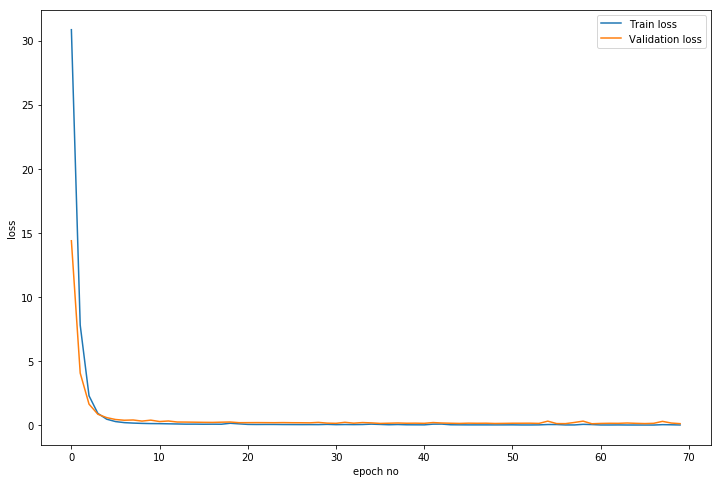

In [64]:
plt.figure(figsize=(12,8))
plt.plot(result.history['loss'],label='Train loss')
plt.plot(result.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

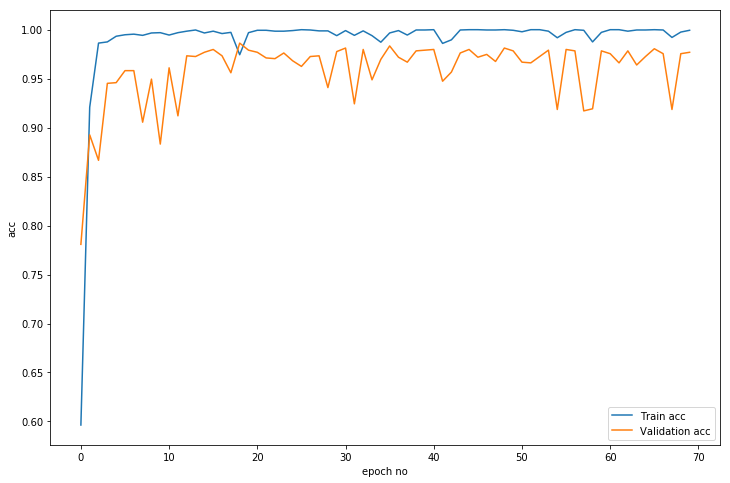

In [65]:
plt.figure(figsize=(12,8))
plt.plot(result.history['acc'],label='Train acc')
plt.plot(result.history['val_acc'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()

In [45]:
##upto 19 epoces will give good score 
K.clear_session()
M59['nb_epoch'] = 19
best_model,result = model_hyperas(M59)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 122, 32)           2048      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 32)           7200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 116, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 736)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                23584     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total para

In [49]:
from sklearn import metrics
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
}

# Utility function to print the confusion matrix
def confusion_matrix_cnn(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    #return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
    return metrics.confusion_matrix(Y_true, Y_pred)

# Confusion Matrix
print(confusion_matrix_cnn(Y_val_d, best_model.predict(X_val_d)))

[[486   0  10]
 [  1 417   2]
 [  3   3 465]]


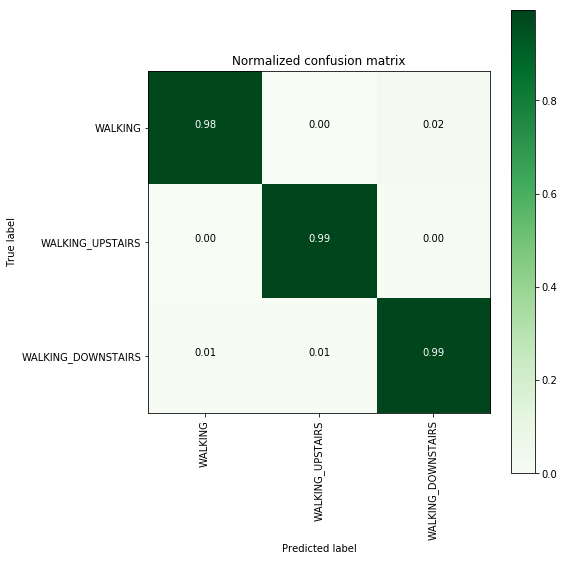

In [57]:
plt.figure(figsize=(8,8))
cm = confusion_matrix_cnn(Y_val_d, best_model.predict(X_val_d))
plot_confusion_matrix(cm, classes=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'], 
                      normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

it is also giving good scores than previous

In [58]:
#saving model
best_model.save('final_model_dynamic.h5')

In [154]:
def data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    # Data directory
    DATADIR = 'UCI_HAR_Dataset'
    # Raw data signals
    # Signals are from Accelerometer and Gyroscope
    # The signals are in x,y,z directions
    # Sensor signals are filtered to have only body acceleration
    # excluding the acceleration due to gravity
    # Triaxial acceleration from the accelerometer is total acceleration
    SIGNALS = [
        "body_acc_x",
        "body_acc_y",
        "body_acc_z",
        "body_gyro_x",
        "body_gyro_y",
        "body_gyro_z",
        "total_acc_x",
        "total_acc_y",
        "total_acc_z"
        ]
    # Utility function to read the data from csv file
    def _read_csv(filename):
        return pd.read_csv(filename, delim_whitespace=True, header=None)

    # Utility function to load the load
    def load_signals(subset):
        signals_data = []

        for signal in SIGNALS:
            filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
            signals_data.append( _read_csv(filename).as_matrix()) 

        # Transpose is used to change the dimensionality of the output,
        # aggregating the signals by combination of sample/timestep.
        # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
        return np.transpose(signals_data, (1, 2, 0))
    
    def load_y(subset):
        """
        The objective that we are trying to predict is a integer, from 1 to 6,
        that represents a human activity. We return a binary representation of 
        every sample objective as a 6 bits vector using One Hot Encoding
        (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
        """
        filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
        y = _read_csv(filename)[0]
        return y
    
    X_train, X_val = load_signals('train'), load_signals('test')
    Y_train, Y_val = load_y('train'), load_y('test')

    return X_train, Y_train, X_val,  Y_val

In [155]:
X_train, Y_train, X_val,  Y_val = data()

In [167]:
print('shape of test Y',Y_val.shape)

shape of test Y (2947,)


### Final prediction pipeline 

In [159]:
##loading keras models and picle files for scaling data 
from keras.models import load_model
import pickle
model_2class = load_model('final_model_2class.h5')
model_dynamic = load_model('final_model_dynamic.h5')
model_static = load_model('final_model_static.h5')
scale_2class = pickle.load(open('Scale_2class.p','rb'))
scale_static = pickle.load(open('Scale_static.p','rb'))
scale_dynamic = pickle.load(open('Scale_dynamic.p','rb'))

In [162]:
##scaling the data
def transform_data(X,scale):
    X_temp = X.reshape((X.shape[0] * X.shape[1], X.shape[2]))
    X_temp = scale.transform(X_temp)
    return X_temp.reshape(X.shape)

In [169]:
#predicting output activity
def predict_activity(X):
    ##predicting whether dynamic or static
    predict_2class = model_2class.predict(transform_data(X,scale_2class))
    Y_pred_2class =  np.argmax(predict_2class, axis=1)
    #static data filter
    X_static = X[Y_pred_2class==1]
    #dynamic data filter
    X_dynamic = X[Y_pred_2class==0]
    #predicting static activities
    predict_static = model_static.predict(transform_data(X_static,scale_static))
    predict_static = np.argmax(predict_static,axis=1)
    #adding 4 because need to get inal prediction lable as output
    predict_static = predict_static + 4
    #predicting dynamic activites
    predict_dynamic = model_dynamic.predict(transform_data(X_dynamic,scale_dynamic))
    predict_dynamic = np.argmax(predict_dynamic,axis=1)
    #adding 1 because need to get inal prediction lable as output
    predict_dynamic = predict_dynamic + 1
    ##appending final output to one list in the same sequence of input data
    i,j = 0,0 
    final_pred = []
    for mask in Y_pred_2class:
        if mask == 1:
            final_pred.append(predict_static[i])
            i = i + 1
        else:
            final_pred.append(predict_dynamic[j])
            j = j + 1 
    return final_pred

In [170]:
##predicting 
final_pred_val = predict_activity(X_val)
final_pred_train = predict_activity(X_train)

In [173]:
##accuracy of train and test
from sklearn.metrics import accuracy_score
print('Accuracy of train data',accuracy_score(Y_train,final_pred_train))
print('Accuracy of validation data',accuracy_score(Y_val,final_pred_val))

Accuracy of train data 0.9832698585418934
Accuracy of validation data 0.9684424838819138


In [182]:
#confusion metric
cm = metrics.confusion_matrix(Y_val, final_pred_val,labels=range(1,7))
cm

array([[486,  10,   0,   0,   0,   0],
       [  3, 465,   3,   0,   0,   0],
       [  1,   2, 417,   0,   0,   0],
       [  1,   2,   0, 447,  41,   0],
       [  0,   0,   0,  27, 505,   0],
       [  0,   0,   0,   3,   0, 534]])

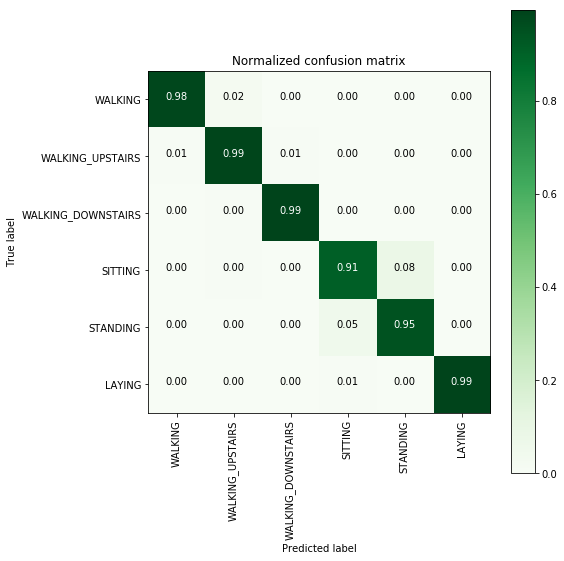

In [184]:
plt.figure(figsize=(8,8))
labels=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
plot_confusion_matrix(cm, classes=labels, 
                      normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Greens)
plt.show()

Divide and Conquer approch with CNN is giving good result with final test accuracy of ~0.97. and train accuracy ~0.98. 